# Notebook per l'estrazione delle misure, il calcolo di Anova e l'esecuzione del Tukey test.


In [1]:
#%matplotlib notebook
import numpy as np
from statsmodels.stats.multicomp import MultiComparison
import matplotlib.pyplot as plt

Dopo aver eseguito l'indicizzazione si è eseguita la valutazione, usando trec_eval, passando il file contenente i giudizi di rilevanza (binaria). Per le quattro diverse run ho salvato ogni output su un file di testo. La seguente cella esegue il parsing del file andando a cercare i valori di AP, il valore MAP (ovvero la media di tutti e 50 i valori di Average Precision per ogni run), il valore rprec e la Precision at 10.
Per identificare le run si utilizza un numero da 0 a 3, l'ordine segue quello richiesto nella consegna dell'homework:

run 0: PorterStemmer, Stopwords, BM25

run 1: PorterStemmer, Stopwords, TF_IDF 

run 2: PorterStemmer, BM25

run 3: senza nulla, TF_IDF

In [2]:
#Funzione che parsa il file e rileva quindi per ogni run le misure AP e MAP. Stampa inoltre i 4 valori di Precision at 10
#e RPrec (uno per ogni run)

#RprecALL = []
#P10ALL = []
mapALL = []
def getMeasures(file, AP, p10, rprec, runID):
    f = open(file,'r')
    datasetLine = [x for x in f.readlines()] #list comprehension
    f.close()

    for line in datasetLine:
        split = line.split()
        if(split[1]!='all'):
            if(split[0]=='map'):
                AP.append(split[2])
            elif(split[0]=='P_10'):
                p10.append(split[2])
            elif(split[0]=='Rprec'):
                rprec.append(split[2])
        else: #(split[1]=='all')
            if (split[0]=='map'):# and split0[1]=='all'):
                print("Map della Run #"+ str(runID))
                print(split[2])
                mapALL.append(split[2])
            elif (split[0]=='P_10'): # and split0[1]=='all'):
                print("Precision at 10 della Run #"+ str(runID))
                print(split[2])
#                P10ALL.append(split[2])
            elif (split[0]=='Rprec'): # and split0[1]=='all'):
                print("Rprec della Run #" + str(runID))
                print(split[2])
#                RprecALL.append(split[2])
                
    print("-----------------------------------------------")

In [3]:
map_0 = []
p10_0 = []
rprec_0 = []

map_1 = []
p10_1 = []
rprec_1 = []

map_2 = [] 
p10_2 = []
rprec_2 = []

map_3 = []
p10_3 = []
rprec_3 = []

getMeasures('0_PS&SL_BM25.txt', map_0, p10_0, rprec_0, 0)
getMeasures('1_PS&SL_TF-IDf.txt', map_1, p10_1, rprec_1, 1)
getMeasures('2_PS_BM25.txt', map_2, p10_2, rprec_2, 2)
getMeasures('3_niente_TF-IDF.txt', map_3, p10_3, rprec_3, 3)

print("Map: ", mapALL)
print("-----------------------------------------------")
#print("Precision at 10, run 0:\n", p10_0)
#print("Precision at 10, run 1:\n", p10_1)
#print("Precision at 10, run 2:\n", p10_2)
#print("Precision at 10, run 3:\n", p10_3)
#print("--------------------------------------")
#print("Precision at Recall Base, run 0:\n", rprec_0)
#print("Precision at Recall Base, run 1:\n", rprec_1)
#print("Precision at Recall Base, run 2:\n", rprec_2)
#print("Precision at Recall Base, run 3:\n", rprec_3)

Map della Run #0
0.1828
Rprec della Run #0
0.2391
Precision at 10 della Run #0
0.4180
-----------------------------------------------
Map della Run #1
0.1821
Rprec della Run #1
0.2391
Precision at 10 della Run #1
0.4200
-----------------------------------------------
Map della Run #2
0.1857
Rprec della Run #2
0.2409
Precision at 10 della Run #2
0.4300
-----------------------------------------------
Map della Run #3
0.1693
Rprec della Run #3
0.2290
Precision at 10 della Run #3
0.4060
-----------------------------------------------
Map:  ['0.1828', '0.1821', '0.1857', '0.1693']
-----------------------------------------------


In [4]:
#matrice con run sulle colonne e AP sulle righe
M = np.vstack((map_0,map_1, map_2, map_3))
print(M.T)
#print("-----------------------------------------")
#print("Precision at 10 =", p_cutoff)
#print("RPrec = ", rprec)

[['0.4181' '0.4163' '0.4110' '0.3349']
 ['0.0373' '0.0370' '0.0349' '0.0347']
 ['0.2185' '0.2163' '0.2198' '0.2221']
 ['0.0750' '0.0729' '0.0801' '0.1026']
 ['0.0765' '0.0768' '0.0857' '0.0702']
 ['0.0104' '0.0105' '0.0105' '0.0120']
 ['0.2657' '0.2688' '0.2688' '0.2732']
 ['0.2394' '0.2398' '0.2311' '0.1326']
 ['0.0155' '0.0162' '0.0151' '0.0204']
 ['0.2238' '0.2184' '0.2233' '0.3910']
 ['0.3065' '0.3065' '0.3038' '0.2564']
 ['0.0739' '0.0729' '0.0776' '0.0906']
 ['0.0437' '0.0432' '0.0431' '0.1594']
 ['0.4758' '0.4758' '0.4778' '0.5314']
 ['0.6838' '0.6834' '0.6682' '0.6964']
 ['0.3936' '0.3676' '0.4300' '0.2415']
 ['0.0774' '0.0774' '0.0764' '0.0767']
 ['0.4264' '0.4267' '0.4038' '0.4247']
 ['0.2703' '0.2703' '0.2657' '0.2657']
 ['0.0968' '0.0922' '0.0927' '0.0868']
 ['0.0021' '0.0021' '0.0019' '0.0022']
 ['0.1370' '0.1297' '0.1575' '0.1008']
 ['0.3783' '0.3765' '0.3752' '0.3986']
 ['0.2292' '0.2283' '0.2211' '0.2812']
 ['0.1793' '0.1814' '0.1735' '0.1737']
 ['0.0137' '0.0165' '0.01

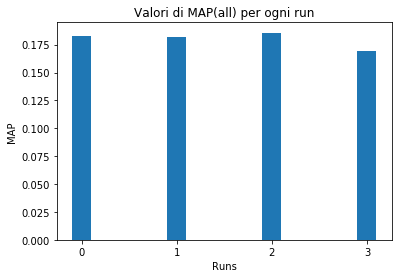

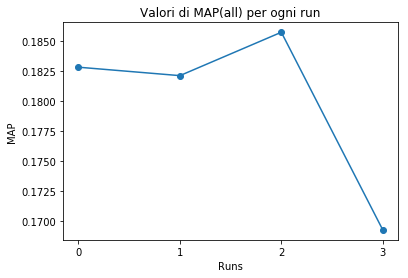

In [5]:
#plot dei 4 valori di MAP (map_all) 
mapALL = list(map(float, mapALL))

#plt.plot([0,1,2,3],mapALL, marker='o')
plt.bar([0,1,2,3], mapALL, width=0.2)
plt.title("Valori di MAP(all) per ogni run")
plt.xticks(range(0, 4))
plt.xlabel("Runs")
plt.ylabel("MAP")
plt.show()

#Questo secondo grafico mostra maggiormente la differenza tra le varie run
plt.plot([0,1,2,3],mapALL, marker='o')
plt.title("Valori di MAP(all) per ogni run")
plt.xticks(range(0, 4))
plt.xlabel("Runs")
plt.ylabel("MAP")
plt.show()

Nelle seguenti celle saranno plottati i risultati ottenuti:
- valore di MAP per ogni run
- valori di AP per ogni topic (quattro grafici diversi a seconda delle diverse run)
- test di Tukey, condotto con le diverse misure, dove sono visibili i paragoni tra le diverse run

In [6]:
#funzione per plot dei diversi valori di Average Precision (AP) per una singola run, per ogni topic
def plotAP(arrayMAP, clr, runID, label):
    #print(len(map_0))
    x = np.empty(50)
    b = np.arange(351, 401, 1) #da 1 a 50 con passo 1
    ind = np.arange(len(x))
    np.put(x, ind, b)
    #print(x)
    #print(arrayMAP)
    arrayMAP = list(map(float, arrayMAP))
    #titolo="Average precision per la run " + str()
    plt.rcParams["figure.figsize"]=[12.0,6.0]
    plt.title(str(label) + " per la run "+ str(runID))
#    plt.plot(x,arrayMAP, marker='o', color=clr)
    plt.bar(x, arrayMAP, width=0.6, color=clr)
    plt.xticks(range(351, 400, 1), rotation=90)
    plt.xlabel("Topics")
    #plt.ylabel("Average Precision")
    plt.ylabel(label)
    plt.show()

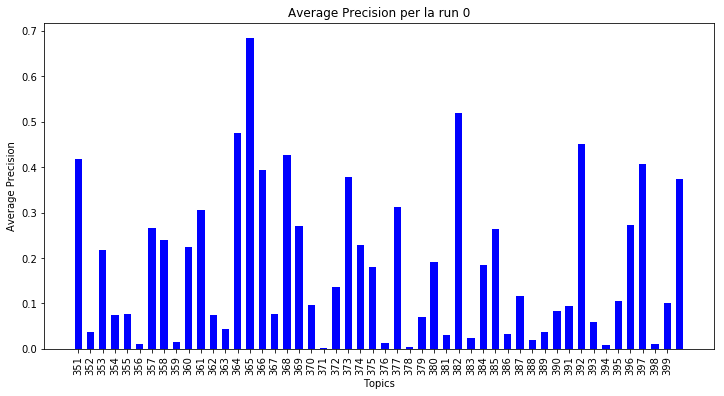

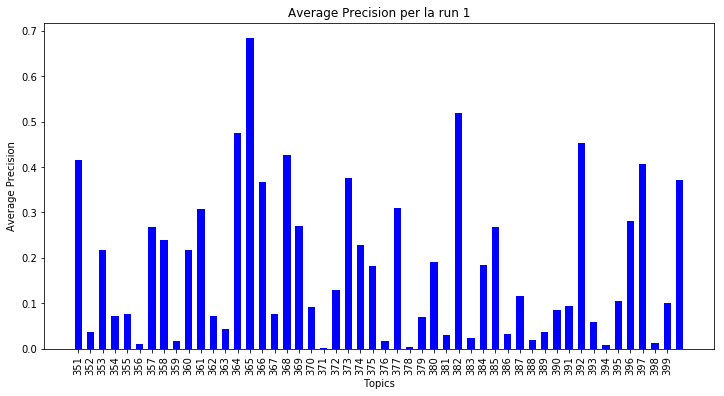

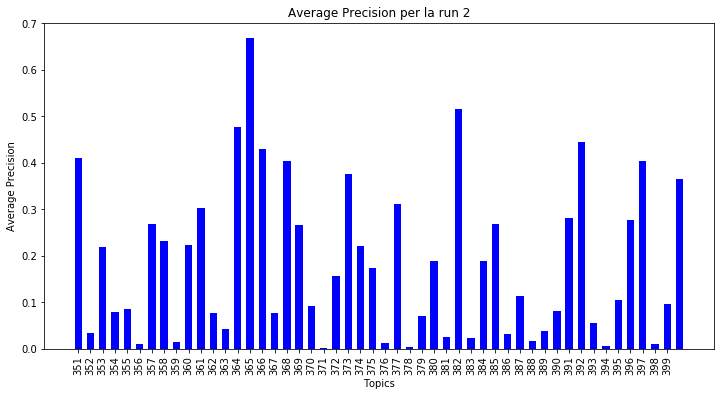

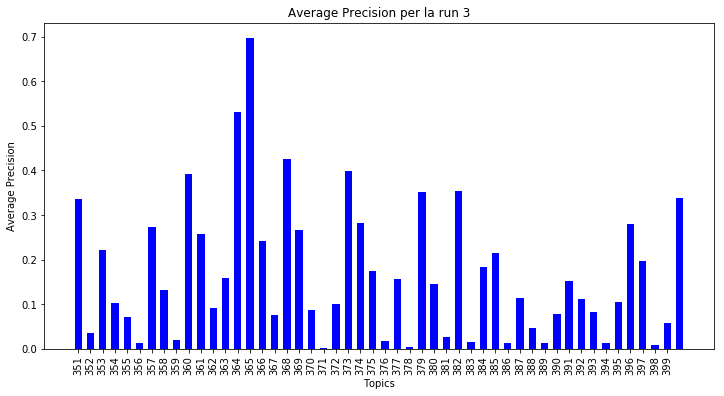

In [7]:
plotAP(map_0, "b", 0,"Average Precision")
plotAP(map_1, "b", 1,"Average Precision")
plotAP(map_2, "b", 2, "Average Precision")
plotAP(map_3, "b", 3, "Average Precision")

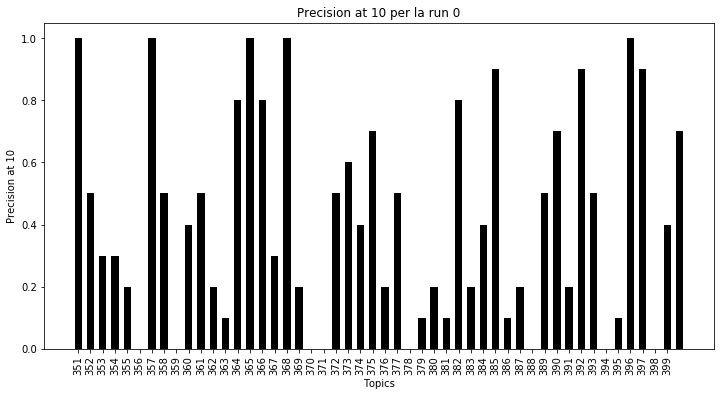

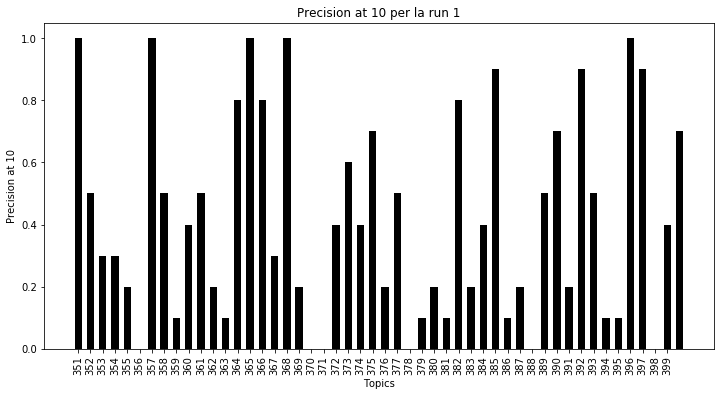

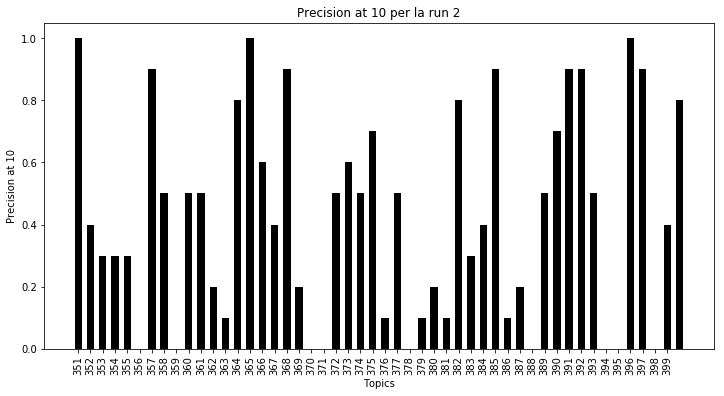

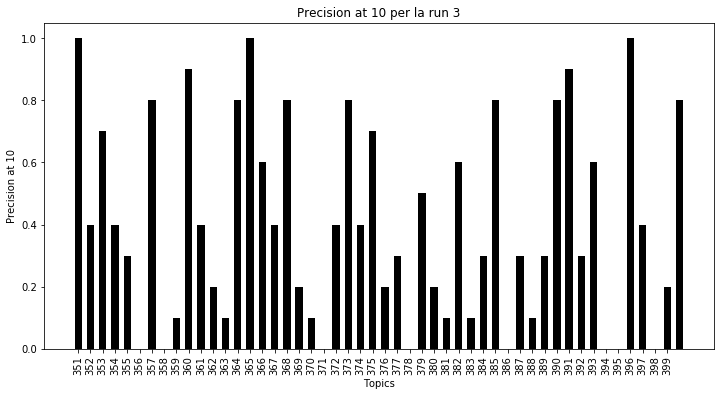

In [8]:
plotAP(p10_0, "black", 0, "Precision at 10")
plotAP(p10_1, "black", 1,"Precision at 10")
plotAP(p10_2, "black", 2,"Precision at 10")
plotAP(p10_3, "black", 3,"Precision at 10")

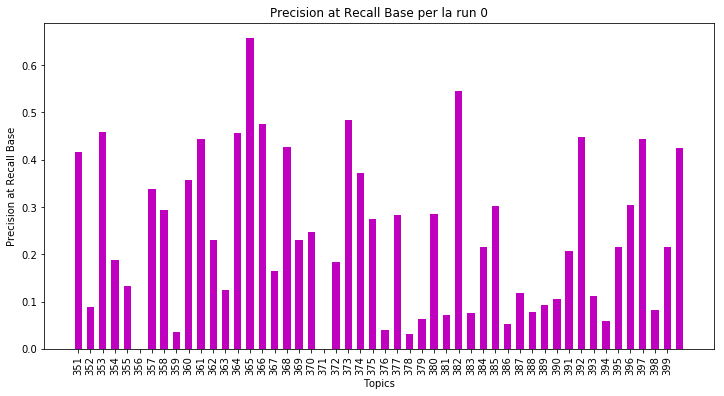

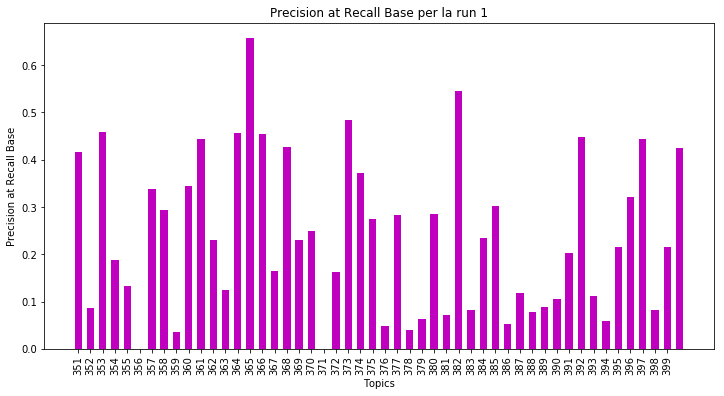

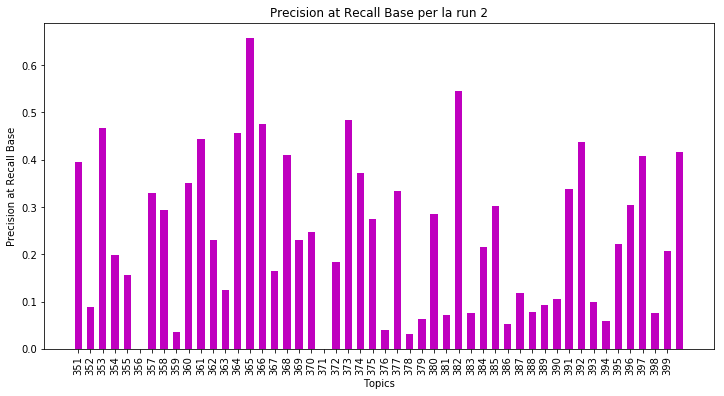

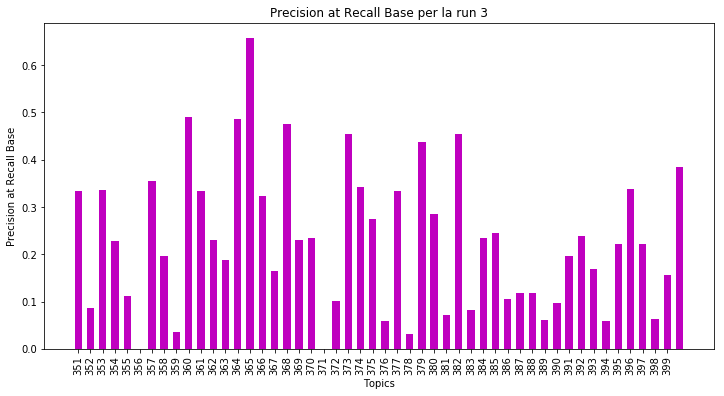

In [9]:
plotAP(rprec_0, "m", 0, "Precision at Recall Base")
plotAP(rprec_1, "m", 1, "Precision at Recall Base")
plotAP(rprec_2, "m", 2, "Precision at Recall Base")
plotAP(rprec_3, "m", 3, "Precision at Recall Base")

Calcolo ora la funzione ANOVA 1 way. La null hypothesis nel nostro caso è "i valori della media sono statisticamente uguali".

Se il p_value restituito (l'area sotto la curva della distribuzione) è minore del parametro alpha allora possiamo rigettare la null hypothesis, altrimenti la rigettiamo.

In [10]:
#compute ANOVA 1 way
import scipy.stats as stats
alpha=0.05

f_stat, p_val = stats.f_oneway(map_0, map_1, map_2, map_3)

print("f_stat (F-value of the test) = ",f_stat)
print("pval (associated p-value from the F-distribution)= ",p_val)
#When we say p value, we are referring to the area under the curve of a distribution.
if(p_val < alpha):
    print("Rigetto la null hypothesis => the differences between some of the means are statistically significant")
else:
    print("fail to reject null hypothesis => same distribution")

f_stat (F-value of the test) =  0.09965024788515882
pval (associated p-value from the F-distribution)=  0.9601256241314807
fail to reject null hypothesis => same distribution


Il test di Tukey è un metodo comune per condurre un'analisi dopo il calcolo dell'Anova 1 way. Questo test, nel nostro caso, compara tutte le possibili coppie di run e mette in evidenza le differenze, seppur minime dato che abbiamo accettato la null hypothesis, tra due medie.



In [11]:
v_maps = np.concatenate([map_0, map_1, map_2, map_3])
print(v_maps.shape)
runs=[]
prova=[]
for i in range (4):
    for j in range (50):
        runs.append("run"+str(i))
#print(runs)
mc = MultiComparison(v_maps.astype('float'), runs)

#result = mc.tukeyhsd()
result=mc.tukeyhsd(alpha=0.05)
#print(result)
print(mc.groupsunique)
print("reject: ", result.reject)
print("meandiffs:", result.meandiffs)
print("confint: ",result.confint)
print("std_pairs: ",result.std_pairs)
print("q_crit: ",result.q_crit)
print(result.summary())

(200,)
['run0' 'run1' 'run2' 'run3']
reject:  [False False False False False False]
meandiffs: [-0.000636  0.002882 -0.01348   0.003518 -0.012844 -0.016362]
confint:  [[-0.08511753  0.08384553]
 [-0.08159953  0.08736353]
 [-0.09796153  0.07100153]
 [-0.08096353  0.08799953]
 [-0.09732553  0.07163753]
 [-0.10084353  0.06811953]]
std_pairs:  [0.02305267 0.02305267 0.02305267 0.02305267 0.02305267 0.02305267]
q_crit:  3.6647169573500507
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
 run0   run1  -0.0006  -0.0851 0.0838 False 
 run0   run2   0.0029  -0.0816 0.0874 False 
 run0   run3  -0.0135   -0.098 0.071  False 
 run1   run2   0.0035   -0.081 0.088  False 
 run1   run3  -0.0128  -0.0973 0.0716 False 
 run2   run3  -0.0164  -0.1008 0.0681 False 
--------------------------------------------


halfwidths (margine d'errore):  [0.04224076 0.04224076 0.04224076 0.04224076]


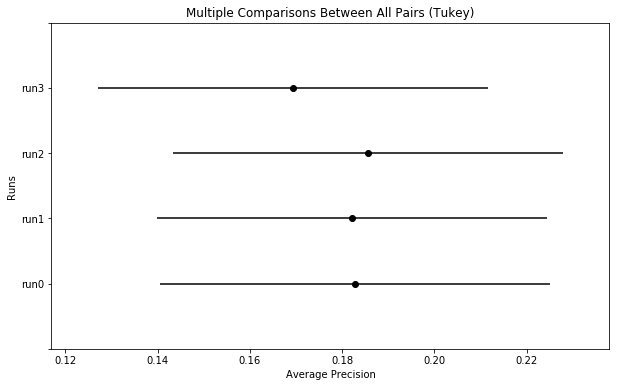

In [12]:
result.plot_simultaneous(xlabel="Average Precision",ylabel="Runs")    # Plot group confidence intervals
#print(result.meandiffs)
print("halfwidths (margine d'errore): ",result.halfwidths)
#print(result.summary())

In [13]:
f_stat, p_val = stats.f_oneway(p10_0, p10_1, p10_2, p10_3)

print("f_stat (F-value of the test) = ",f_stat)
print("pval (associated p-value from the F-distribution)= ",p_val)
#When we say p value, we are referring to the area under the curve of a distribution.
if(p_val < alpha):
    print("Rigetto la null hypothesis => the differences between some of the means are statistically significant")
else:
    print("fail to reject null hypothesis => same distribution")

f_stat (F-value of the test) =  0.04457260749284944
pval (associated p-value from the F-distribution)=  0.987464448897553
fail to reject null hypothesis => same distribution


(200,)
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
 run0   run1  -0.0006  -0.0851 0.0838 False 
 run0   run2   0.0029  -0.0816 0.0874 False 
 run0   run3  -0.0135   -0.098 0.071  False 
 run1   run2   0.0035   -0.081 0.088  False 
 run1   run3  -0.0128  -0.0973 0.0716 False 
 run2   run3  -0.0164  -0.1008 0.0681 False 
--------------------------------------------
['run0' 'run1' 'run2' 'run3']
halfwidths (margine d'errore):  [0.08547956 0.08547956 0.08547956 0.08547956]


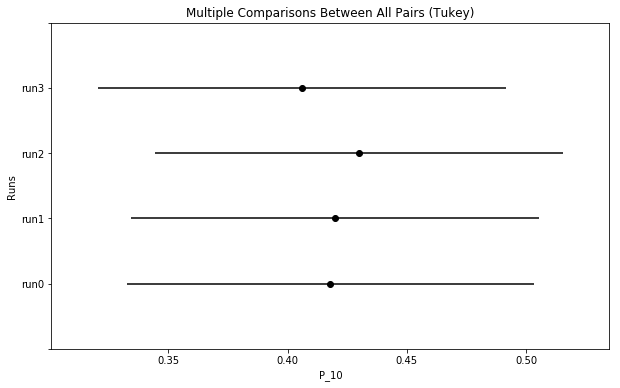

In [14]:
v_prec = np.concatenate([p10_0, p10_1, p10_2, p10_3])
print(v_prec.shape)
runs=[]
prova=[]
for i in range (4):
    for j in range (50):
        runs.append("run"+str(i))
#print(runs)
mc1 = MultiComparison(v_prec.astype('float'), runs)

#result = mc.tukeyhsd()
result1=mc1.tukeyhsd(alpha=0.05)
print(result)
print(mc1.groupsunique)
#print("reject: ", result.reject)
#print("meandiffs:", result.meandiffs)
#print("confint: ",result.confint)
#print("std_pairs: ",result.std_pairs)
#print("q_crit: ",result.q_crit)
#print(result.summary())

result1.plot_simultaneous(xlabel="P_10",ylabel="Runs")    # Plot group confidence intervals
#print(result.meandiffs)
print("halfwidths (margine d'errore): ",result1.halfwidths)
#print(result.summary())

In [15]:
f_stat, p_val = stats.f_oneway(rprec_0, rprec_1, rprec_2, rprec_3)

print("f_stat (F-value of the test) = ",f_stat)
print("pval (associated p-value from the F-distribution)= ",p_val)
#When we say p value, we are referring to the area under the curve of a distribution.
if(p_val < alpha):
    print("Rigetto la null hypothesis => the differences between some of the means are statistically significant")
else:
    print("fail to reject null hypothesis => same distribution")

f_stat (F-value of the test) =  0.056650173017138324
pval (associated p-value from the F-distribution)=  0.9822337717671986
fail to reject null hypothesis => same distribution


(200,)
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
 run0   run1  -0.0006  -0.0851 0.0838 False 
 run0   run2   0.0029  -0.0816 0.0874 False 
 run0   run3  -0.0135   -0.098 0.071  False 
 run1   run2   0.0035   -0.081 0.088  False 
 run1   run3  -0.0128  -0.0973 0.0716 False 
 run2   run3  -0.0164  -0.1008 0.0681 False 
--------------------------------------------
['run0' 'run1' 'run2' 'run3']
halfwidths (margine d'errore):  [0.0418245 0.0418245 0.0418245 0.0418245]


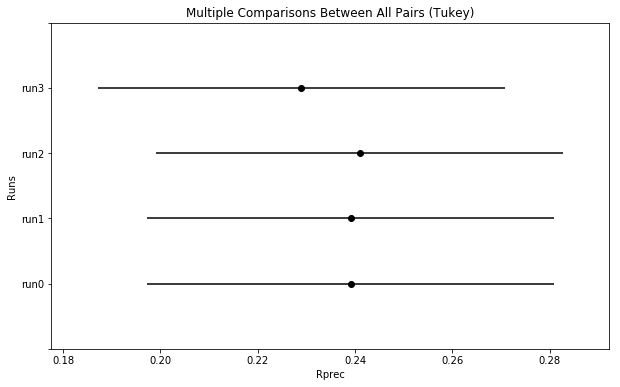

In [16]:
v_Rprec = np.concatenate([rprec_0, rprec_1, rprec_2, rprec_3])
print(v_Rprec.shape)
runs=[]
prova=[]
for i in range (4):
    for j in range (50):
        runs.append("run"+str(i))
#print(runs)
mc1 = MultiComparison(v_Rprec.astype('float'), runs)

#result = mc.tukeyhsd()
result1=mc1.tukeyhsd(alpha=0.05)
print(result)
print(mc1.groupsunique)
#print("reject: ", result.reject)
#print("meandiffs:", result.meandiffs)
#print("confint: ",result.confint)
#print("std_pairs: ",result.std_pairs)
#print("q_crit: ",result.q_crit)
#print(result.summary())

result1.plot_simultaneous(xlabel="Rprec",ylabel="Runs")    # Plot group confidence intervals
#print(result.meandiffs)
print("halfwidths (margine d'errore): ",result1.halfwidths)